### Treść zadania

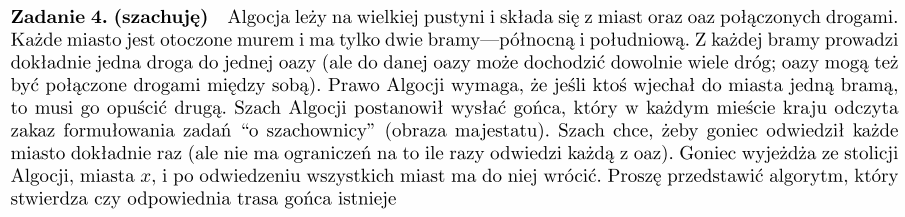

### Omówienie algorytmu (z BIT Algo)

###### Graf wejściowy:
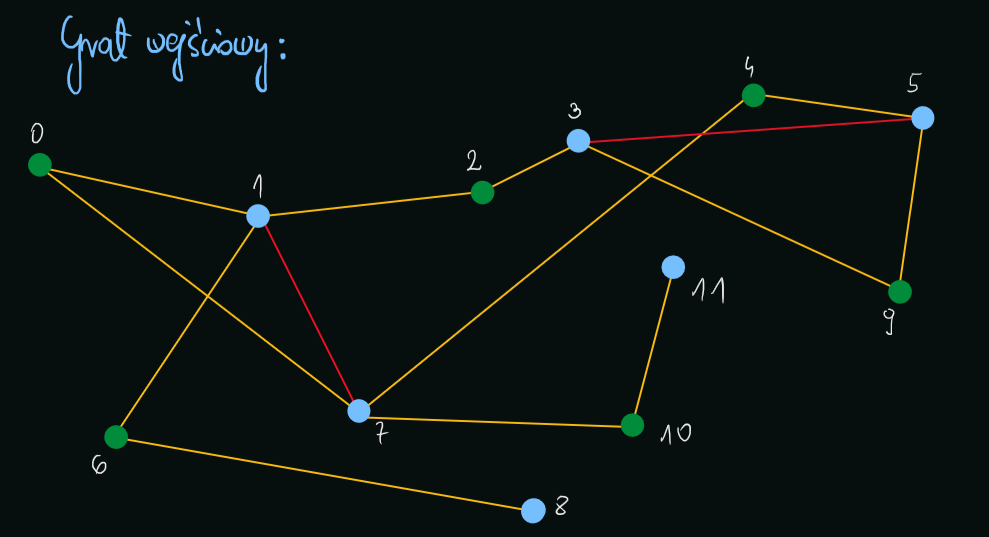
###### Krok #1: Zamiana miast na krawędzie
(Jeżeli jest kilka kolejno połączonych ze sobą miast, trakrujemy je jako jedną krawędź, ponieważ, gdy wejdziemy do pierwszego spośród tych miast, musimy przejść przez wszystkie kolejne)
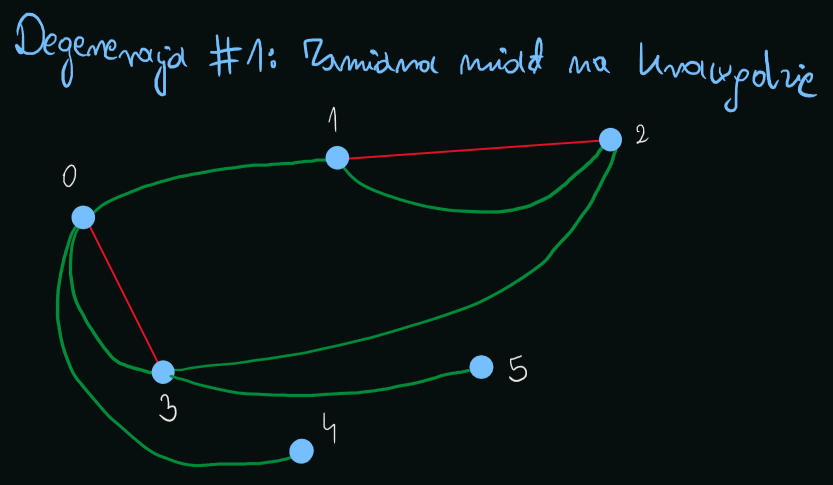
###### Krok #2: Scalanie oaz, które są połączone krawędziami, przez które możemy przejść wiele razy:
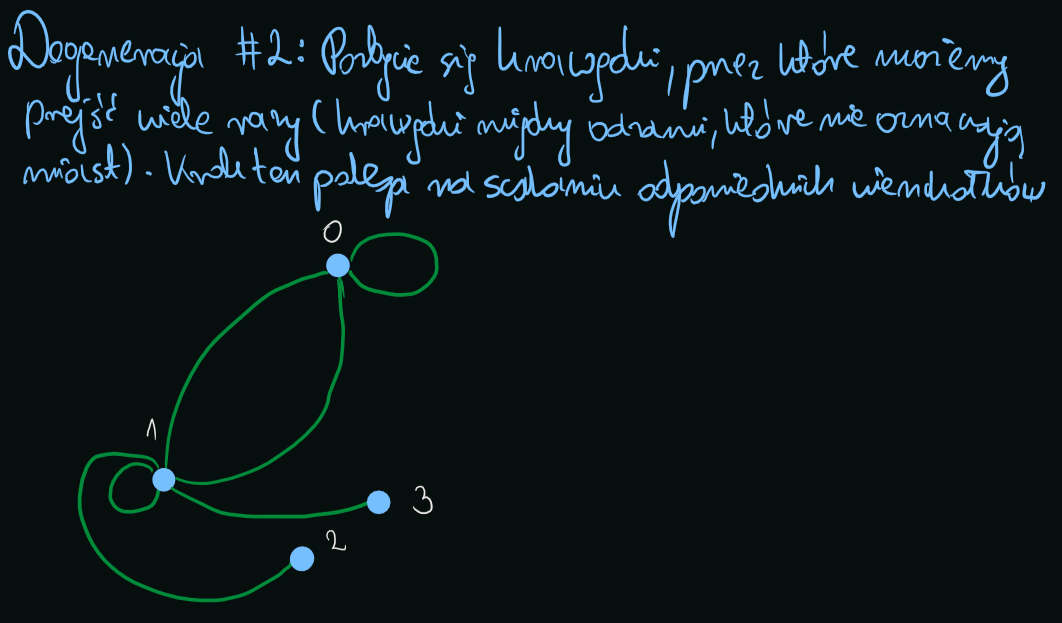

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V + E) $ - bo tworzymy nowy graf

### Implementacja

In [1]:
def create_graph(E: 'array of edges', C: 'array of cities indices'):
    # Find a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create an array which will represent a graph
    G = [[False, []] for _ in range(n)]
    for edge in E:
        G[edge[0]][1].append(edge[1])
        G[edge[1]][1].append(edge[0])
    # Mark vertices which are cities
    for city in C:
        G[city][0] = True
    return G


def cities_to_edges(G: 'graph'):
    n = len(G)
    new_oasis_indices = [-1] * n  # Helper array to map indices of oasis in the new graph
    
    idx = 0
    for i in range(n):
        if not G[i][0]:
            new_oasis_indices[i] = idx
            idx += 1
    
    # Create a new graph
    new_n = idx
    new_G = [[0, []] for _ in range(new_n)]
    visited = [False] * n
    
    for i in range(n):
        # Continue if mapped a city before
        if visited[i]: continue
        # Mark the current vertex as visited
        visited[i] = True
        # If is a city (it must have 2 neighbours - always)
        if G[i][0]:
            # Get its neighbours
            u = G[i][1][0]
            v = G[i][1][1]
            # While at least of the neighbours is a city, loop till we reach an oasis
            prev_u = prev_v = i
            while G[u][0]: 
                visited[u] = True
                u, prev_u = G[u][1][0] if G[u][1][0] != prev_u else G[u][1][1], u
            while G[v][0]: 
                visited[v] = True
                v, prev_v = G[v][1][0] if G[v][1][0] != prev_v else G[v][1][1], v
            # When both vertices are now oasis, we can add an edge representing
            # all the cities on a way (we have to visit them all at once)
            new_u = new_oasis_indices[u]
            new_v = new_oasis_indices[v]
            new_G[new_u][1].append((True, new_v))  # True means this edge is a city
            new_G[new_v][1].append((True, new_u))  # True means this edge is a city
            # Increment a number of connected city edges to the oasis
            new_G[new_u][0] += 1  
            new_G[new_v][0] += 1  
        # If it's an oasis
        else:
            # An oasis can have multiple neighbours but cities will be covered in the case above,
            # so we will add only edges between oasis in here
            new_u = new_oasis_indices[i]
            for v in G[i][1]:
                if not G[v][0]:  # If is also an oasis
                    new_v = new_oasis_indices[v]
                    # Add only one edge as the remaining ones will be added from the other oasis
                    new_G[new_u][1].append((False, new_v))  # False means this edge connects two oasis
    return new_G


def degree_after_oasis_merge(G, oasis_u, visited):
    deg = 0
    
    def dfs(u):
        visited[u] = True
        # If u is a vertex which has at least one city edge connected, all the city
        # edges will be linked to the beginning vertex, so its degree will be increased
        # by the number of city edges outgoing from the u edge
        if G[u][0]:
            nonlocal deg
            deg += G[u][0]
            
        for i in range(len(G[u][1])):
            # If hasn't been visited yet and is not a city edge
            v = G[u][1][i][1]
            is_city_edge = G[u][1][i][0]
            if not visited[v] and not is_city_edge:
                dfs(v)
                
    dfs(oasis_u)
    
    return deg


def does_path_exist(E: 'array of edges', C: 'array of cities indices'):
    G = create_graph(E, C)
    if len(C) == len(G): return True  # We have a cycle - no oasis there
    G = cities_to_edges(G)
    n = len(G)
    visited = [False] * n
    
    print(*G, sep='\n')
    
    for u in range(n):
        if not visited[u]:
            # Check if the resulting graph will be Eulerian or not
            # (if found a vertex of odd degree, return False)
            deg = degree_after_oasis_merge(G, u, visited)
            
            print(u, deg)
            
            if deg % 2:
                return False
    return True

Kilka testów

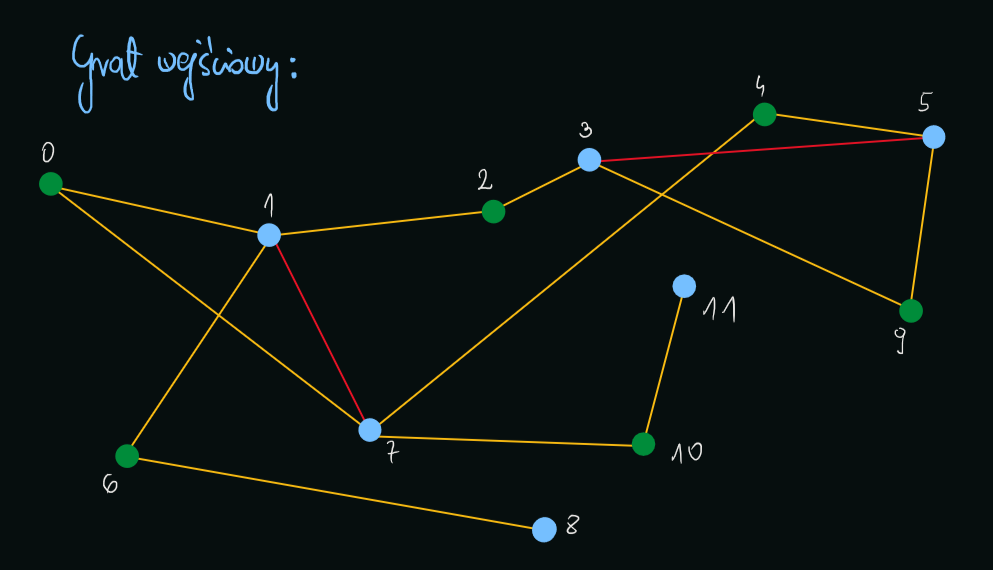

In [2]:
E = [(0, 1), (1, 2), (2, 3), (3, 5), (4, 5), (4, 7), (5, 9), (3, 9), (1, 7), (0, 7), (7, 10), (10, 11),
     (1, 6), (6, 8)]
C = [0, 2, 9, 4, 10, 6]

print(does_path_exist(E, C))

[3, [(True, 3), (False, 3), (True, 1), (True, 4)]]
[2, [(True, 0), (False, 2), (True, 2)]]
[2, [(True, 3), (False, 1), (True, 1)]]
[3, [(True, 0), (True, 2), (False, 0), (True, 5)]]
[1, [(True, 0)]]
[1, [(True, 3)]]
0 6
1 4
4 1
False


###### Przykład 1:

##### Debug:

In [3]:
E = [(0, 1), (1, 2), (2, 3), (3, 5), (4, 5), (4, 7), (5, 9), (3, 9), (1, 7), (0, 7), (7, 10), (10, 11),
     (1, 6), (6, 8)]
C = [0, 2, 9, 4, 10, 6]

G = create_graph(E, C)

In [4]:
G

[[True, [1, 7]],
 [False, [0, 2, 7, 6]],
 [True, [1, 3]],
 [False, [2, 5, 9]],
 [True, [5, 7]],
 [False, [3, 4, 9]],
 [True, [1, 8]],
 [False, [4, 1, 0, 10]],
 [False, [6]],
 [True, [5, 3]],
 [True, [7, 11]],
 [False, [10]]]

In [5]:
cities_to_edges(G)

[[3, [(True, 3), (False, 3), (True, 1), (True, 4)]],
 [2, [(True, 0), (False, 2), (True, 2)]],
 [2, [(True, 3), (False, 1), (True, 1)]],
 [3, [(True, 0), (True, 2), (False, 0), (True, 5)]],
 [1, [(True, 0)]],
 [1, [(True, 3)]]]

###### Przykład 2:

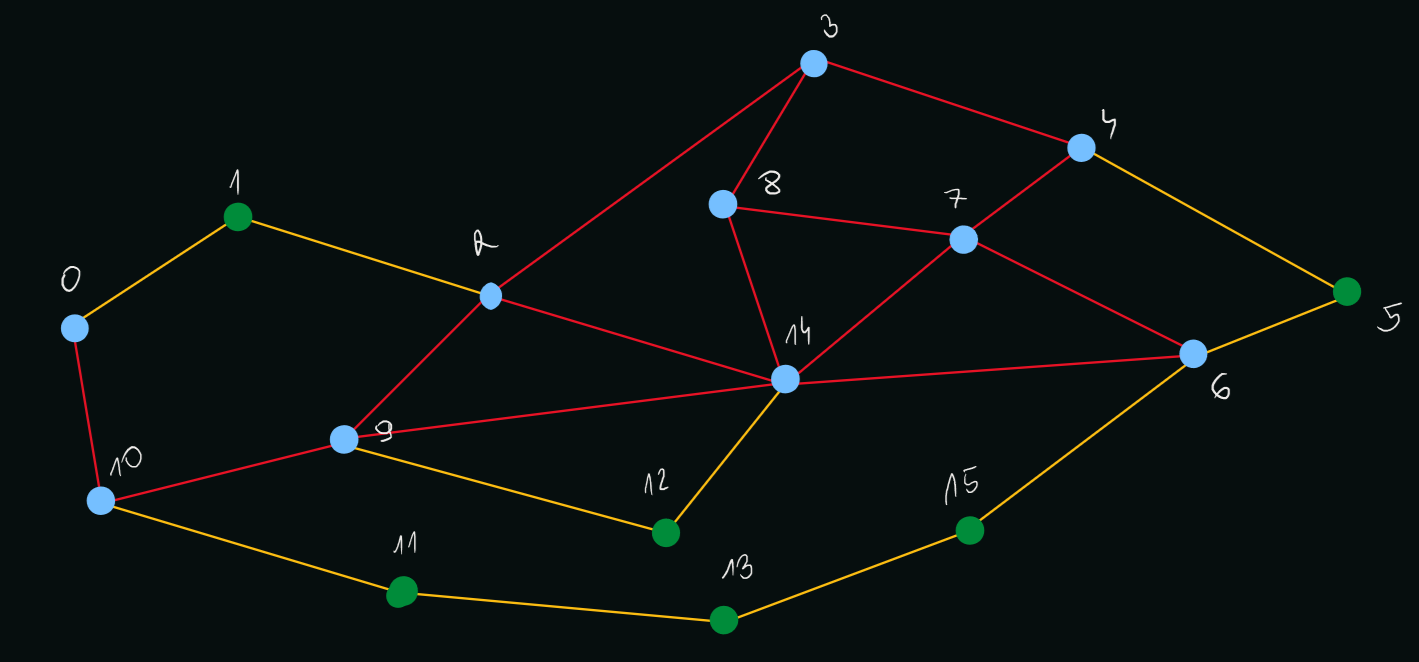

In [6]:
E = [(0, 1), (1, 2), (0, 10), (2, 9), (2, 14), (2, 3), (3, 8), (8, 14), (9, 14), (10, 9), (3, 4),
     (8, 7), (7, 4), (14, 7), (4, 5), (7, 6), (6, 5), (14, 6), (9, 12), (12, 14), (10, 11), (11, 13),
     (13, 15), (15, 6)]
C = [1, 11, 13, 12, 15, 5]

print(does_path_exist(E, C))

[1, [(False, 8), (True, 1)]]
[1, [(True, 0), (False, 7), (False, 9), (False, 2)]]
[0, [(False, 1), (False, 6), (False, 3)]]
[1, [(False, 2), (False, 5), (True, 4)]]
[2, [(True, 3), (False, 5), (False, 9), (True, 8)]]
[0, [(False, 6), (False, 3), (False, 9), (False, 4)]]
[0, [(False, 2), (False, 9), (False, 5)]]
[1, [(False, 1), (False, 9), (False, 8), (True, 9)]]
[1, [(False, 0), (False, 7), (True, 4)]]
[1, [(True, 7), (False, 1), (False, 6), (False, 7), (False, 5), (False, 4)]]
0 8
True


##### Debug:

In [7]:
E = [(0, 1), (1, 2), (0, 10), (2, 9), (2, 14), (2, 3), (3, 8), (8, 14), (9, 14), (10, 9), (3, 4),
     (8, 7), (7, 4), (14, 7), (4, 5), (7, 6), (6, 5), (14, 6), (9, 12), (12, 14), (10, 11), (11, 13),
     (13, 15), (15, 6)]
C = [1, 11, 13, 12, 15, 5]

G = create_graph(E, C)

In [8]:
G

[[False, [1, 10]],
 [True, [0, 2]],
 [False, [1, 9, 14, 3]],
 [False, [2, 8, 4]],
 [False, [3, 7, 5]],
 [True, [4, 6]],
 [False, [7, 5, 14, 15]],
 [False, [8, 4, 14, 6]],
 [False, [3, 14, 7]],
 [False, [2, 14, 10, 12]],
 [False, [0, 9, 11]],
 [True, [10, 13]],
 [True, [9, 14]],
 [True, [11, 15]],
 [False, [2, 8, 9, 7, 6, 12]],
 [True, [13, 6]]]

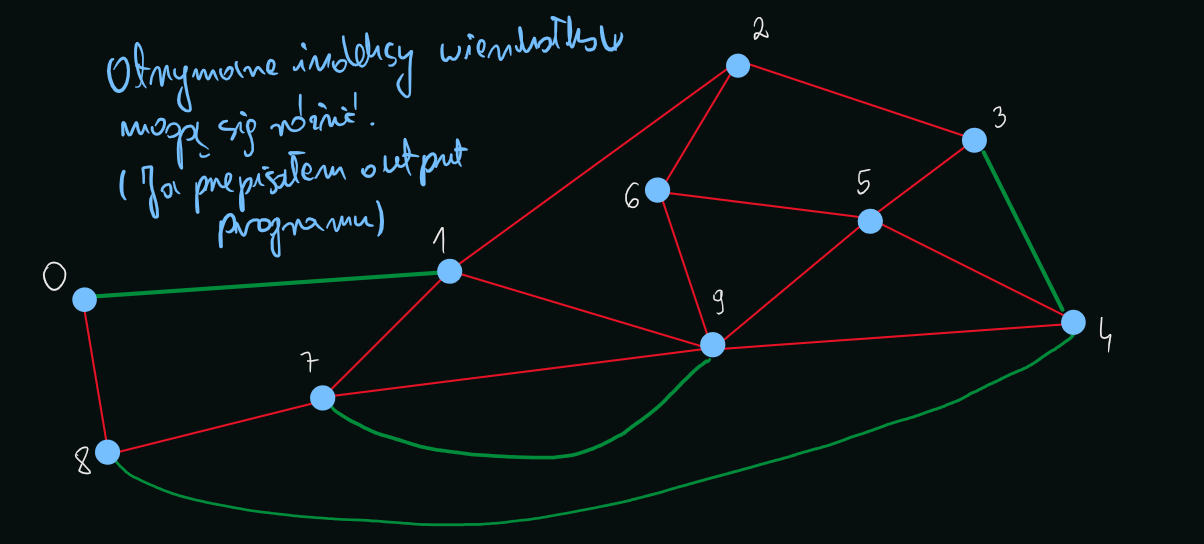

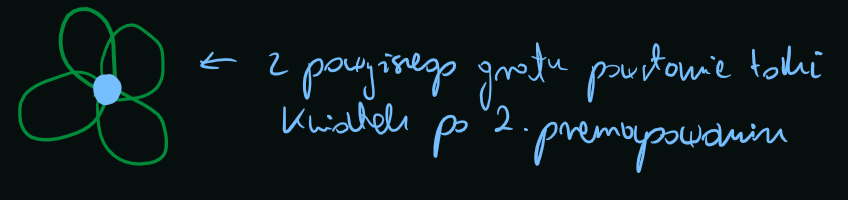

In [9]:
G2 = cities_to_edges(G)
G2

[[1, [(False, 8), (True, 1)]],
 [1, [(True, 0), (False, 7), (False, 9), (False, 2)]],
 [0, [(False, 1), (False, 6), (False, 3)]],
 [1, [(False, 2), (False, 5), (True, 4)]],
 [2, [(True, 3), (False, 5), (False, 9), (True, 8)]],
 [0, [(False, 6), (False, 3), (False, 9), (False, 4)]],
 [0, [(False, 2), (False, 9), (False, 5)]],
 [1, [(False, 1), (False, 9), (False, 8), (True, 9)]],
 [1, [(False, 0), (False, 7), (True, 4)]],
 [1, [(True, 7), (False, 1), (False, 6), (False, 7), (False, 5), (False, 4)]]]

In [10]:
degree_after_oasis_merge(G2, 0, [False] * len(G2))

8